# Lab Two: Exploring Image Data

- https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

# 1. Business Understanding
- Malaria is a life-threatening disease spread to humans by mosquitoes, and is considered to be a severe public health issue. According to the World Health Organization, globally in 2022, there were an estimated 249 million malaria cases and 608,000 malaria deaths in 85 countries (source: https://www.who.int/news-room/fact-sheets/detail/malaria). The WHO African Region carries a disproportionate amount of the global malaria burden at 94% of malaria cases (233 million) and 95% (580,000) of malaria deaths. The infection caused by a parasite from the mosquito is preventable and curable. One method of preventing malaria is through thorough surveillance of it.

- The `Malaria Cell Images Dataset` contains over 27,000 images of cells that are labeled as either `parasitized` or `uninfected`. Each image will be converted to greyscale and resized to a 64x64 pixel image for data processing. The dataset was collected to improve the detection of malaria via image classification, in order to reduce the burden of malaria worldwide. According to the National Library of Medicine, existing drugs make malaria a curable disease, but inadequate diagnostics and emerging drug resistances are major barriers to successful mortality reduction. Therefore, the development of a fast and reliable diagnostic method is one of the most promising methods to fight malaria (source: https://lhncbc.nlm.nih.gov/LHC-research/LHC-projects/image-processing/malaria-project.html). 

- Accurate parasite counts are essential to diagnosing malaria correctly. However, performing microscopic diagnostics is not standardized in every region and depends on the skills and experience of the microscopist. In areas of lower resources, diagnostic quality can be negatively impacted, leading to incorrect diagnostics. In instances where false negative cases arise, this means unnecessary use of antibiotics, a second consultation, or even severe progression in malaria. In instances with false positive cases, a misdiagnosis means unnecessary use of anti-malaria treatments and resource depletion for those who might actually be suffering from malaria. The prediction algorithm for our case would need to be highly accurate, and avoid both false negatives and false positives altogether for it to be successful. We would measure the part of the success of our algorithm using metrics like `precision` and `recall`. High precision would ensure fewer false positives, while high recall ensures fewer false negatives. An `F1 score` that balances both metrics would provide a comprehensive assessment of the model's performance. It is impractical to believe that our prediction algorithm could reach 100% accuracy in classifying whether a cell is infected or not because some who may have been infected may not experience severe symptoms due to prior past infections or immunities. When considering our measure for a successful algorithm, we considered third parties that would be interested in the results.

- Accurate and precise malaria diagnostics would benefit `public health organizations`, `disease researchers`, and `hospitals`. Public health organizations, such as WHO, would benefit from our binary classification analysis because they can use our data to accurately diagnose someone with malaria, and provide appropriate treatment options to reduce the severity of the disease and prevent mortality. In areas that lack adequate and appropriate resources, having a tool that accurately and precisely detects malaria could save the lives of millions, especially in the WHO African Region. Due to its disproportionate amount of global malaria burden, the WHO African Region cannot afford to have false negatives or false positives, since that would deplete their malaria treatment resources without adequately addressing the issue. We aim for our prediction algorithm to achieve 95-97% accuracy in classifying whether a cell is infected with malaria. It is equally important that the precision of the algorithm aligns with this accuracy to minimize false negatives and false positives, which we seek to avoid. Our target of 95-97% accuracy is based on the performance of current diagnostic tools, such as EasyScan Go, where human microscopists typically achieve accuracy rates of 85-90% (source: https://malariajournal.biomedcentral.com/articles/10.1186/s12936-022-04146-1). Achieving a 5-10% improvement from EasyScan Go is doable, as high quality smears and stainings are paramount in allowing a machine-learning algorithm to analyze infected cells, which is something EasyScan Go's current technology is unable to achieve at the moment. For example, incorporating noise reduction parameters can aid the screening tool in more accurately identifying and diagnosing an infected cell. 

- Another stakeholder that would appreciate our data are disease researchers. By studying the patterns that are exhibited from infected and uninfected cells, researchers can develop treatment plans that can aid in preventing or even treating the infections. According to WHO, partial resistance in antimalarial drugs has emerged in the WHO African Region (source: https://www.who.int/news-room/fact-sheets/detail/malaria). Accurate and precise classification of malaria cells, along with the discovery of patterns and trends, can help disease researchers develop new antimalarial drugs that are less prone to resistance. Faster diagnosis enables a quicker response, which can delay or prevent the onset of drug resistance.

- Lastly, hospitals can benefit from this screening tool as it can allocate appropriate resources to those who are infected or uninfected. By having a prediction algorithm of 95-97% accuracy and precision, hospitals can more confidently start treatment plans for those infected. If a false positive arises, the worst case is using malaria treatment on someone who does not need it. The only issue with this occurs when the hospital is in an area with limited supplies, or a public health emergency emerges. In this case, the accuracy and precision of our algorithm needs to be 97% and higher, in order to conserve as much resources as possible. However, in general, hospitals would benefit from this malaria screening tool because they can plan ahead for the resources they'll need by geographic location. 

- The prediction task for this dataset is a binary classification to detect whether a cell is parasitized or not with malaria, essentially developing an accurate and precise screening tool for malaria. Key stakeholders that would be interested in our results are public health organizations, disease researchers, and hospitals. This data is important because early and accurate detection of malaria can improve patient outcomes and reduce the burden of the disease. This data could also facilitate faster, more scalable diagnostics in essential regions where traditional microscopy is either too slow or resource-intensive. Achieving higher accuracy and precision with our algorithm would reduce the strain on healthcare workers and improve diagnostic precision in regions with limited medical expertise, ultimately to reduce the burden of malaria worldwide. Lastly, using metrics like precision and recall, and an F1 score can provide an assessment of our model's overall performance. This dataset can have important global implications, offering scalable solutions for regions that face sporadic and disproportionate malaria outbreaks. 

- Dataset: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

# 2. Data Preparation

In [65]:
# Modules and Libraries
import os
import random
import time
from collections import Counter

# Numerical and data manipulation libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Machine learning and data processing libraries
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Interactive widgets and visualization libraries
from ipywidgets import widgets, interactive
import plotly
from plotly.graph_objs import Bar, Scatter, Layout
from plotly.graph_objs.layout import XAxis, YAxis

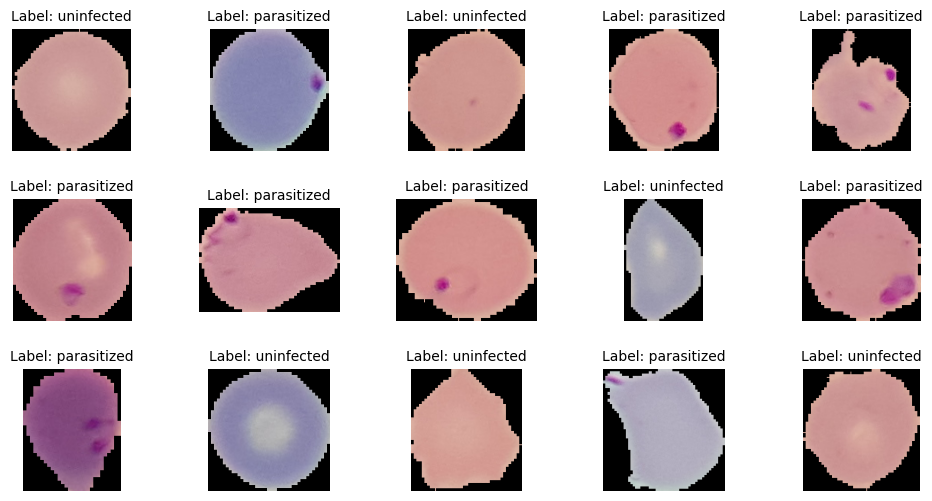

In [67]:
# Directory path
image_dir = '/Users/salissa/Desktop/ML/Labs/Lab Two/cell_images'

# Lists to store original imgs & labels
original_images = []
original_labels = []

# Iterating through subdirectories to load images
for category in ['parasitized', 'uninfected']:
    category_dir = os.path.join(image_dir, category)
    image_files = [f for f in os.listdir(category_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Stores the original image and label for images
        original_images.append(img)  
        original_labels.append(category)  

# Displaying 15 random original images
num_images_to_show = 15
rows, cols = 3, 5
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Random sample, select based on sampled indices
indices = random.sample(range(len(original_images)), num_images_to_show)
selected_images = [original_images[i] for i in indices]
selected_labels = [original_labels[i] for i in indices]

# Loop through selected images for display
for i in range(num_images_to_show):
    plt.subplot(rows, cols, i + 1)

    # Convert image from BGR(OpenCV format) to RGB 
    plt.imshow(cv2.cvtColor(selected_images[i], cv2.COLOR_BGR2RGB))  
    plt.axis('off')
    plt.title(f"Label: {selected_labels[i]}", fontsize=10)

# Display
plt.show()

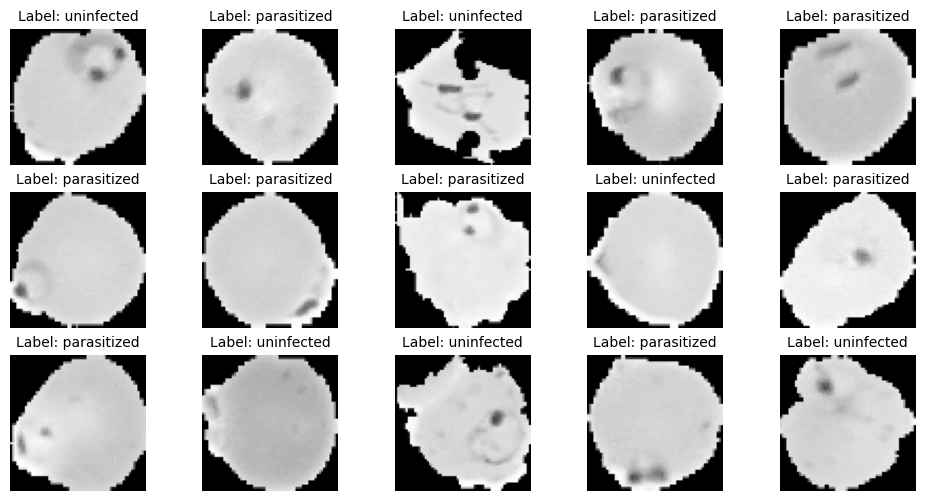

In [69]:
# Lists to store processed imgs and labels
images = [] 
labels = []

# Iterating through subdirectories to process imgs
for category in ['parasitized', 'uninfected']:
    category_dir = os.path.join(image_dir, category)
    image_files = [f for f in os.listdir(category_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        # Resizing and converting to grayscale
        img_resized = cv2.resize(img, (64, 64))
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        # Stores the processed image and label for image
        images.append(img_gray)  
        labels.append(category)  

# Display 15 random processed grayscale images
plt.figure(figsize=(12, 6))

# Loop through number of images for display
for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray') 
    plt.axis('off')  # Hide axes
    plt.title(f"Label: {selected_labels[i]}", fontsize=10) 

# Display
plt.show()

In [70]:
# Converting list of imgs to numpy array
images_np = np.array(images)
print(f"Shape of images_np: {images_np.shape}")

Shape of images_np: (27558, 64, 64)


In [73]:
# Linearizing the images, flatten each image into a 1-D array
# Unpacking 3D shape to later reshape
n_images, height, width = images_np.shape

# Converting 2D image into 1D arr & Normalizing the pixels in range [0, 1]
images_flattened = images_np.reshape(n_images, height * width) / 255.0 

# Display info about flattened images
print(f"Number of images: {n_images}")
print(f"Flattened image shape: {images_flattened.shape}")

Number of images: 27558
Flattened image shape: (27558, 4096)


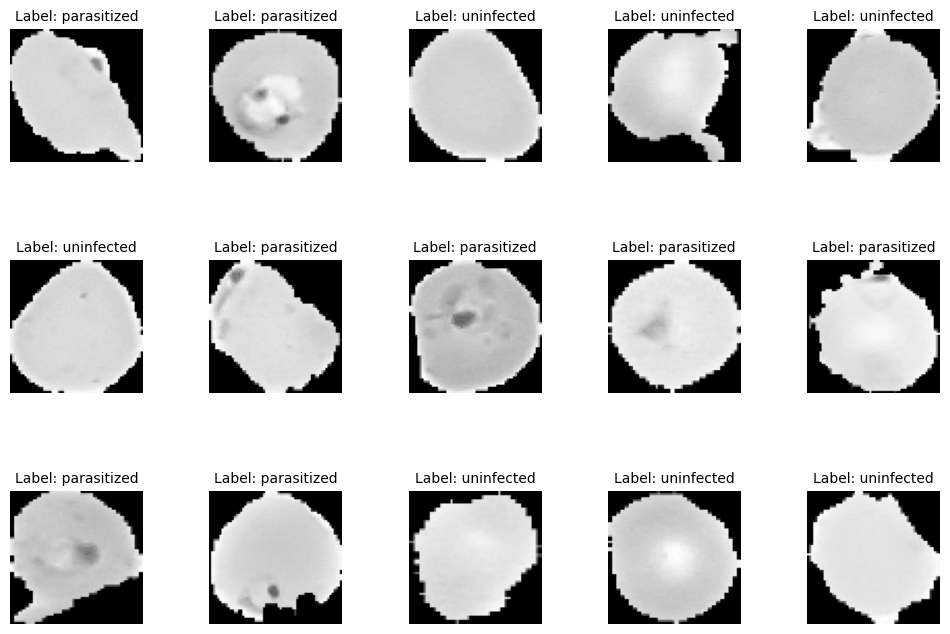

In [75]:
# Visualizing Several Images
# Shuffling images and labels together
images_np, labels = shuffle(images_np, labels, random_state=42)

# Visualize 15 random imgs 3x5 grid
num_images_to_show = 15
plt.figure(figsize=(12, 8))
rows, cols = 3, 5

# Loop through number of images for display
for i in range(num_images_to_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images_np[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {labels[i]}", fontsize=10)
    
# Adding space, display
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [77]:
# Counting occurrences of each label
label_counts = Counter(labels)
print(f"Number of parasitized images: {label_counts['parasitized']}")
print(f"Number of uninfected images: {label_counts['uninfected']}")

Number of parasitized images: 13779
Number of uninfected images: 13779


# 3. Data Reduction (6 points total)
- [.5 points] Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.


In [79]:
# Function to plot the explained variance
def plot_explained_variance(pca):
    plotly.offline.init_notebook_mode()

    # Extract explained variance ratio and cumulative variance
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)

    # Plot individual and cumulative explained variance
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(
            xaxis=XAxis(title='Principal components'), 
            yaxis=YAxis(title='Explained variance ratio')
        )
    })

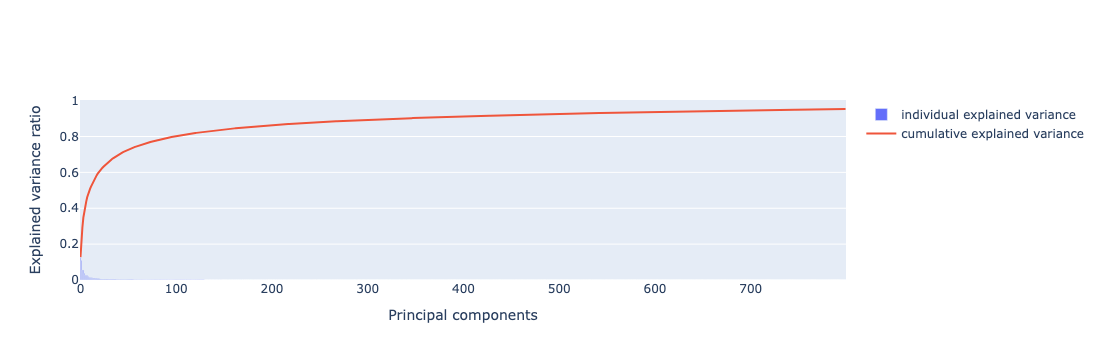

In [81]:
# Performing Linear Dimensionality Reduction Using PCA
# Number of components to keep
n_components = 800
pca = PCA(n_components=n_components)

# Fit PCA of flattened img data, copy to not alter original
X_pca = pca.fit(images_flattened.copy()) 

# Plot explained variance 
plot_explained_variance(pca)

# Display
plt.show()

In [83]:
# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Variance thresholds to check
thresholds = [0.85, 0.90, 0.95]

# Dictionary for threshold
components_for_thresholds = {}

# Iterate through cumulative explained variance to find the number of components for each threshold
for i, cumulative in enumerate(cumulative_variance):
    for threshold in thresholds[:]:
        if cumulative >= threshold: 
            components_for_thresholds[threshold] = i + 1
            print(f"Number of components for {int(threshold * 100)}% variance: {components_for_thresholds[threshold]}")
            
            # Removes satified threshold avoids rechecking
            thresholds.remove(threshold)

Number of components for 85% variance: 172
Number of components for 90% variance: 336
Number of components for 95% variance: 751


In [85]:
# Get the individual explained variance (variance for each component)
individual_explained_variance = pca.explained_variance_ratio_

# Print the individual explained variance for each component
print("Individual explained variance for each component:")
for i, var in enumerate(individual_explained_variance):
    print(f"Component {i+1}: {var:.5f}")

Individual explained variance for each component:
Component 1: 0.12736
Component 2: 0.10900
Component 3: 0.05632
Component 4: 0.05523
Component 5: 0.03711
Component 6: 0.02693
Component 7: 0.02486
Component 8: 0.02445
Component 9: 0.01892
Component 10: 0.01515
Component 11: 0.01281
Component 12: 0.01234
Component 13: 0.01215
Component 14: 0.01065
Component 15: 0.01060
Component 16: 0.01055
Component 17: 0.01021
Component 18: 0.00998
Component 19: 0.00828
Component 20: 0.00815
Component 21: 0.00764
Component 22: 0.00601
Component 23: 0.00569
Component 24: 0.00560
Component 25: 0.00557
Component 26: 0.00544
Component 27: 0.00530
Component 28: 0.00524
Component 29: 0.00518
Component 30: 0.00478
Component 31: 0.00450
Component 32: 0.00441
Component 33: 0.00413
Component 34: 0.00408
Component 35: 0.00382
Component 36: 0.00373
Component 37: 0.00354
Component 38: 0.00350
Component 39: 0.00347
Component 40: 0.00330
Component 41: 0.00327
Component 42: 0.00321
Component 43: 0.00316
Component 44:

## PCA Analysis:

### Individual Explained Variance
- The first principal component accounts for 12.74% of the total variance, while the second component accounts for 10.90%. After the initial components, diminishing returns occur as seen in components 6 to 10, where each explain less than 3% of the variance. This pattern s typical in PCA where the first few components capture the most significant variance and subsequent components contribute progressively less.

### Dimensions Required
- Despite the diminishing returns after the first few components, we chose to retain 800 principal components for the following reasons:
    - 1) To cover 95% of the variance, 751 principal components are required. We opted for 800 components to ensure a more comprehensive representation of the dataset. This ensures that the dataset is well-represented, preserving as much information as possible, which is crucial for an accurate classification of the cell images. 
    - 2) Since we are working on classifying whether a cell image is infected or not, maintaining a high level of variance is essential to minimize false positives and negatives. Retaining 800 components, allows us to capture more detailed patterns in the data potentially improving the performance of our classification model. 
    - 3) If we were satisfied with 85% variance, we would require 172 dimensions, nearly half of what is required for 90%. However given the importance of retaining variance for detecting infections, we chose to cover 95% of the variance. This trade-off reflects a balance between dimensionality reduction and preserving the nuances in the data.

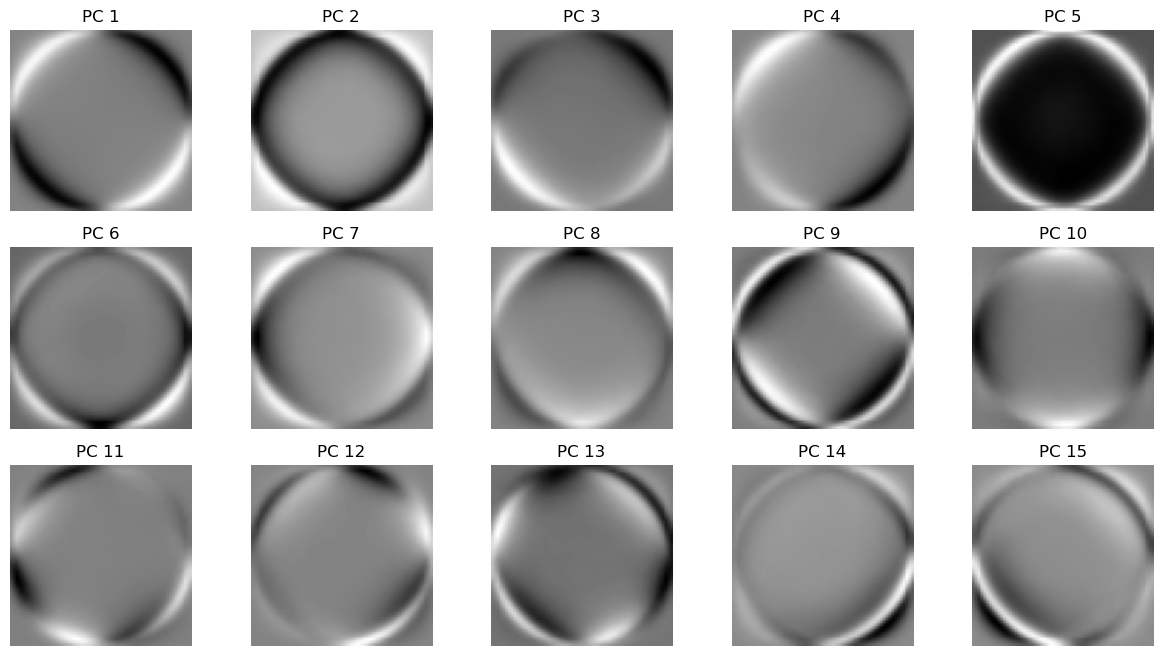

In [88]:
# Getting the principal components (eigenfaces)
eigenfaces = pca.components_.reshape((n_components, 64, 64))

# Visualizing first 15 principal components (eigenfaces)
plt.figure(figsize=(15, 8))

# Display the first 15 eigenfaces
for i in range(num_images_to_show):  
    plt.subplot(3, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')

# Display
plt.show()

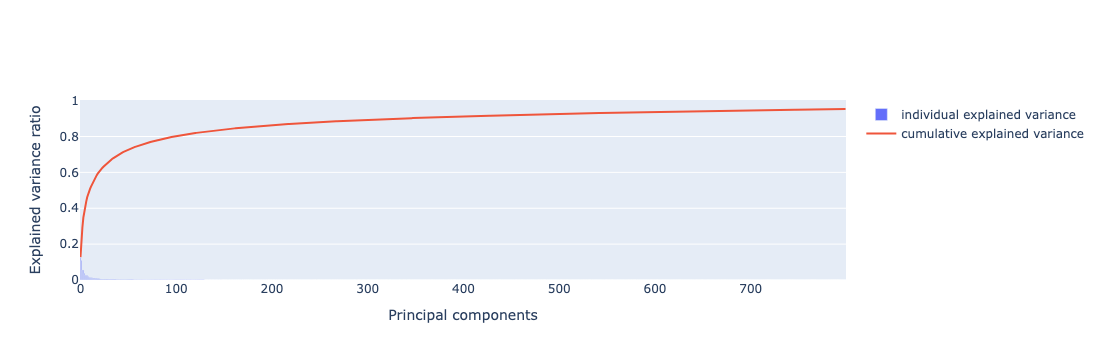

In [90]:
# Visualize explained variance
plot_explained_variance(pca)

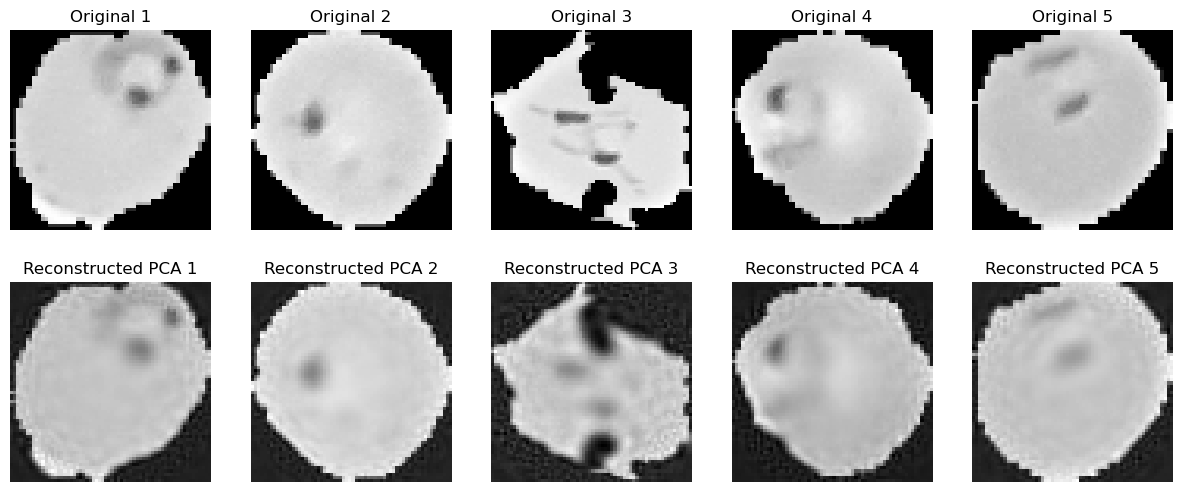

In [92]:
def reconstruct_image(trans_obj,org_features):
    # Project original image lower dimensional
    low_rep = trans_obj.transform(org_features)

    # Reconstruct image 
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

# Examples to visualize
num_examples = 5

# Plot original and reconstructed images
plt.figure(figsize=(15,6))

for i in range(num_examples):
    # Index of image to reconstruct
    idx_to_reconstruct = i    
    X_idx = images_flattened[idx_to_reconstruct]

    # Get low dimensional representation and reconstruct
    low_dimensional_representation, reconstructed_image = reconstruct_image(pca, X_idx.reshape(1, -1))

    # Original image
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_idx.reshape((64, 64)), cmap=plt.cm.gray)
    plt.title(f'Original {i+1}')
    plt.axis('off')
    
    # Reconstruct image from PCA
    plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(reconstructed_image.reshape((64,64)), cmap=plt.cm.gray)
    plt.title(f'Reconstructed PCA {i+1}')
    plt.axis('off')

# Display
plt.show()

## Original vs Reconstructed from Full PCA
- The reconstruction from Full PCA demonstrates that the original image is fairly well preserved, with key features such as the shape of the cell and some finer details still recognizable. This confirms that PCA can serve as a meaningful tool for dimensionality reduction while maintaining the integrity of the original data.

- In our case, we chose to retain 800 principal components, which captures 95% of the variance in the dataset. This decision was made to ensure that we are accounting for both the major structural elements and more subtle patterns present in the cell images. By capturing this amount of variance, we strike a balance between dimensionality reduction and retaining sufficient detail, which is critical for the accuracy of subsequent analysis or classification tasks.

## [.5 points]
- Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.


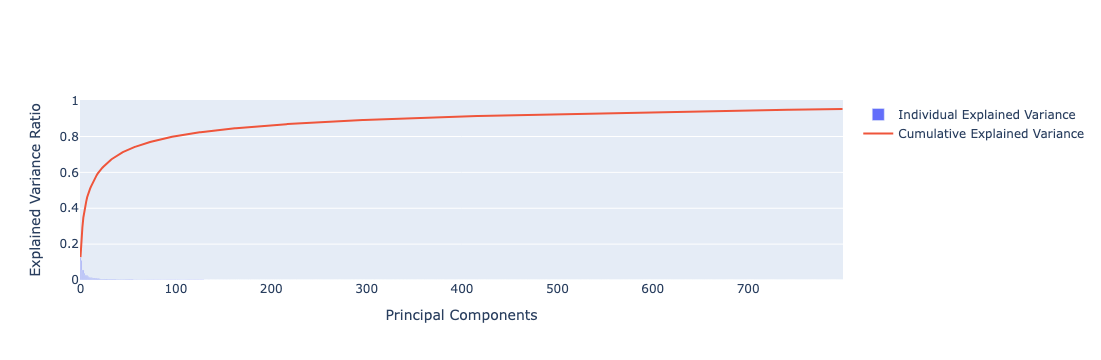

In [94]:
# Performing Linear Dimensionality Reduction Using Randomized PCA
rpca = PCA(n_components=n_components, svd_solver='randomized')
X_pca = rpca.fit(images_flattened.copy())

# Function to plot the explained variance
def plot_explained_variance(rpca):
    explained_var = rpca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)

    # Plot individual and explained variance
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='Individual Explained Variance'),
                 Scatter(y=cum_var_exp, name='Cumulative Explained Variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal Components'), yaxis=YAxis(title='Explained Variance Ratio'))
    })
    
# Call function to plot  
plot_explained_variance(rpca)

In [107]:
# Compute cumulative explained variance
rpca = PCA(n_components, svd_solver='randomized')
X_pca = rpca.fit(images_flattened.copy()) 

cumulative_variance = np.cumsum(rpca.explained_variance_ratio_)

# Initialize variables to store the number of components for 85%, 90%, and 95% variance
components_85 = None
components_90 = None
components_95 = None

# Iterate through cumulative explained variance to find the number of components for each threshold
for i, cumulative in enumerate(cumulative_variance):
    if cumulative >= 0.85 and components_85 is None:
        components_85 = i + 1
        print(f"Number of components for 85% variance: {components_85}")
    
    if cumulative >= 0.90 and components_90 is None:
        components_90 = i + 1
        print(f"Number of components for 90% variance: {components_90}")

    if cumulative >= 0.95 and components_95 is None:
        components_95 = i + 1
        print(f"Number of components for 95% variance: {components_95}")

    # Break the loop once all thresholds are met
    if components_85 and components_90 and components_95:
        break

Number of components for 85% variance: 172
Number of components for 90% variance: 336
Number of components for 95% variance: 752


In [98]:
# Get the individual explained variance (variance for each component)
individual_explained_variance = rpca.explained_variance_ratio_

# Print the individual explained variance for each component
print("Individual explained variance for each component:")
for i, var in enumerate(individual_explained_variance):
    print(f"Component {i+1}: {var:.5f}")

Individual explained variance for each component:
Component 1: 0.12736
Component 2: 0.10900
Component 3: 0.05632
Component 4: 0.05523
Component 5: 0.03711
Component 6: 0.02693
Component 7: 0.02486
Component 8: 0.02445
Component 9: 0.01892
Component 10: 0.01515
Component 11: 0.01281
Component 12: 0.01234
Component 13: 0.01215
Component 14: 0.01065
Component 15: 0.01060
Component 16: 0.01055
Component 17: 0.01021
Component 18: 0.00998
Component 19: 0.00828
Component 20: 0.00815
Component 21: 0.00764
Component 22: 0.00601
Component 23: 0.00569
Component 24: 0.00560
Component 25: 0.00557
Component 26: 0.00544
Component 27: 0.00530
Component 28: 0.00524
Component 29: 0.00518
Component 30: 0.00478
Component 31: 0.00450
Component 32: 0.00441
Component 33: 0.00413
Component 34: 0.00408
Component 35: 0.00382
Component 36: 0.00373
Component 37: 0.00354
Component 38: 0.00350
Component 39: 0.00347
Component 40: 0.00330
Component 41: 0.00327
Component 42: 0.00321
Component 43: 0.00316
Component 44:

## Analysis for Randomized PCA 

### Individual Explained Variance
- The individual explained variance for the first principal component accounts for 12.74% of the total variance, while the second component explains 10.90%. These values are comparable to the results obtained using traditional full PCA. This similarity is expected because both full PCA and randomized PCA are designed to efficiently capture the most significant directions of variance within the data. As in full PCA, the explained variance decreases as the number of components increases, with each subsequent component contributing less to the total variance. This decreasing trend is consistent across both methods, demonstrating that randomized PCA effectively mirrors the patterns observed in full PCA, but with a computational advantage when dealing with large datasets.

### Dimensions Required
- Just like full PCA, we retained 800 dimensions to capture 95% of the variance, which is our target for the classification model. Randomized PCA approximates this result closely, as both methods aim to identify the minimum number of components required to represent the data with a specified variance threshold. The cumulative explained variance curve, which represents the accumulated variance explained by adding more components, crosses the 95% threshold with around the same number of dimensions as in full PCA. This suggests that, although randomized PCA uses an approximation technique, it still provides a reliable estimate of the number of dimensions necessary to achieve the desired variance retention. Additionally, this approach offers significant computational efficiency, especially with large, high-dimensional datasets, without sacrificing accuracy.

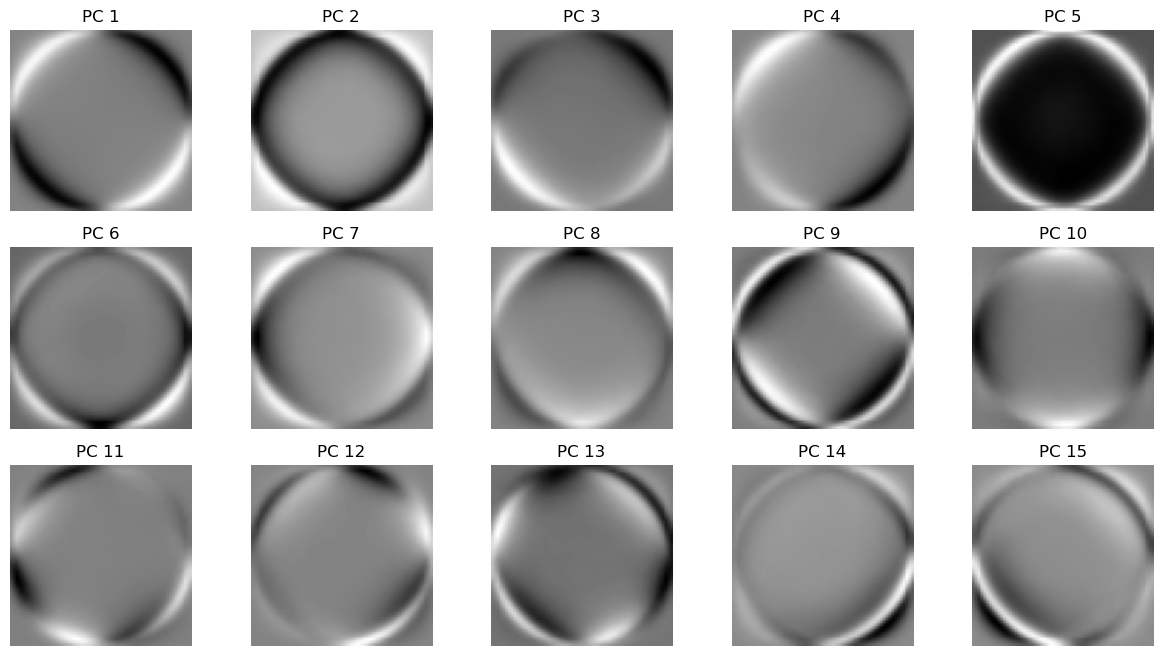

In [111]:
# Getting the principal components (eigenfaces)
eigenfaces = rpca.components_.reshape((n_components, 64, 64))

# Visualizing a few of the top principal components (eigenfaces)
plt.figure(figsize=(15, 8))

# Loop through the first 15 eigenfaces on 3 x 5 grid
for i in range(num_images_to_show):  
    plt.subplot(3, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')

# Display
plt.show()

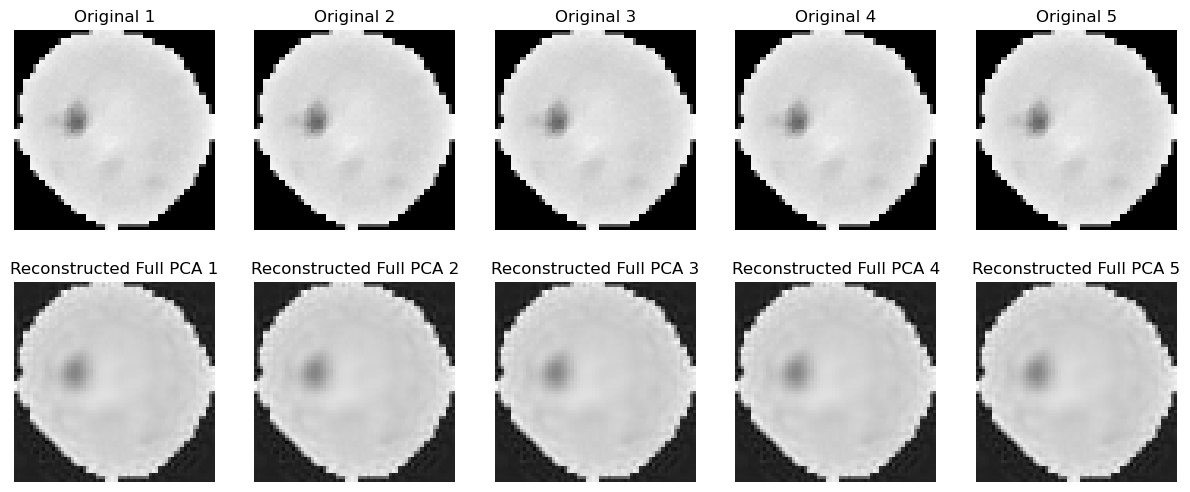

In [113]:
def reconstruct_image(trans_obj, org_features):
    # Project original image lower dimensional
    low_rep = trans_obj.transform(org_features)

    # Reconstruct image
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

# Examples to visualize
num_examples = 5

# Create a plot for original and reconstructed images
plt.figure(figsize=(15, 6))

# Loop through multiple images
for i in range(num_examples):
    # Index of image to reconstruct
    idx_to_reconstruct = 1    
    X_idx = images_flattened[idx_to_reconstruct]

    # Get low dimensional representation and reconstruct
    low_dimensional_representation, reconstructed_image = reconstruct_image(rpca, X_idx.reshape(1, -1))

    # Original image
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_idx.reshape((64, 64)), cmap=plt.cm.gray)
    plt.title(f'Original {i+1}')
    plt.axis('off')
        
    # Reconstruct image from PCA
    plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(reconstructed_image.reshape((64,64)), cmap=plt.cm.gray)
    plt.title(f'Reconstructed Full PCA {i+1}')
    plt.axis('off')

# Display
plt.show()

### Original vs Reconstructed from Randomized PCA
- As shown above, randomized PCA reconstructs our original image with a high degree of accuracy, successfully preserving the overall structure of the cell and capturing key details. This indicates that randomized PCA is not only effective for dimensionality reduction but also retains enough information to provide meaningful visual and data-driven insights. By reducing the dimensionality while maintaining the integrity of the image, we can compare the reconstructed image to the original and still identify important features like cell shape, which is critical for accurate classification in medical imaging tasks like detecting malaria.

- Similar to full PCA, we opted to retain 800 components or dimensions because this allows us to capture 95% of the variance in the dataset. This percentage was chosen to ensure that even subtle details and patterns within the cell images are preserved. Capturing this amount of variance ensures that essential information, particularly smaller structures or variations that could be important for identifying whether a cell is infected or not, is not lost in the dimensionality reduction process. The ability of randomized PCA to approximate this variance with significantly reduced computational cost makes it a powerful tool for high-dimensional data, such as image datasets, where preserving as much detail as possible is crucial for accurate downstream tasks like classification or segmentation.

- This reconstruction comparison shows that, although randomized PCA is an approximation technique, it is still able to capture and reconstruct the data with a high level of fidelity, similar to full PCA. This demonstrates its effectiveness in scenarios where computational resources or speed is a concern without sacrificing accuracy or detail, especially when working with large-scale image datasets.

## [2 points] 
Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components. Do you prefer one method over another? Why?

In [118]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.3, random_state=42)

# Number of components
n_components = 800

# PCA with full solver
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Randomized PCA (same n_components)
rpca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_train_rpca = rpca.fit_transform(X_train)
X_test_rpca = rpca.transform(X_test)

In [122]:
# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train on PCA-reduced data
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy using Full PCA: {accuracy_pca:.4f}')

# Train on Randomized PCA-reduced data
knn.fit(X_train_rpca, y_train)
y_pred_rpca = knn.predict(X_test_rpca)
accuracy_rpca = accuracy_score(y_test, y_pred_rpca)
print(f'Accuracy using Randomized PCA: {accuracy_rpca:.4f}')

# Cumalative variance
print(f'Cumulative variance explained by Full PCA: {np.sum(pca.explained_variance_ratio_):.4f}')
print(f'Cumulative variance explained by Randomized PCA: {np.sum(rpca.explained_variance_ratio_):.4f}')

Accuracy using Full PCA: 0.5021
Accuracy using Randomized PCA: 0.4989
Cumulative variance explained by Full PCA: 0.9544
Cumulative variance explained by Randomized PCA: 0.9544


In [124]:
# Timing Full PCA
# Start timer
start_time = time.time()

# Perform PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(images_flattened.copy())

# End timer
end_time = time.time()

# Calculate elapsed time
pca_time = end_time - start_time
print(f"Time taken for Full PCA: {pca_time:.5f} seconds")

Time taken for Full PCA: 25.17927 seconds


In [126]:
# Timing Randomized PCA
# Start timer
start_time = time.time()

# Perform PCA
rpca = PCA(n_components=n_components, svd_solver='randomized')
X_rpca = rpca.fit_transform(images_flattened.copy())

# End timer
end_time = time.time()

# Calculate elapes time
rpca_time = end_time - start_time
print(f"Time taken for Randomized PCA: {rpca_time:.5f} seconds")

Time taken for Randomized PCA: 27.48039 seconds


### **Comparison of PCA and Randomized PCA**

#### **Quantitative Analysis:**

In this experiment, we applied both Full PCA and Randomized PCA to the image dataset, evaluated their performance using a K-Nearest Neighbors (KNN) classifier, and compared the execution time for each method. The goal was to reduce dimensionality while maintaining the classification accuracy and computational efficiency.

#### **1. Accuracy Results:**

- **Accuracy using Full PCA:** 0.5021
- **Accuracy using Randomized PCA:** 0.4989

Both methods produced nearly identical accuracy scores, with Full PCA achieving a slightly higher accuracy than Randomized PCA. The difference between the two is minimal, showing that Randomized PCA approximates the performance of Full PCA quite well in terms of classification accuracy.

#### **2. Cumulative Explained Variance:**

- **Cumulative variance explained by Full PCA:** 95.44%
- **Cumulative variance explained by Randomized PCA:** 95.44%

Both PCA and Randomized PCA explained the same amount of variance with 800 components, indicating that Randomized PCA is successfully approximating the full method in terms of capturing the underlying structure of the data. This confirms that Randomized PCA can represent the data with the same level of detail as Full PCA when retaining 95% of the variance.

#### **3. Computational Efficiency (Timing):**

- **Time taken for Full PCA:** 25.17927 seconds
- **Time taken for Randomized PCA:** 27.48039 seconds

Surprisingly, in this case, Full PCA was faster than Randomized PCA. Typically, Randomized PCA is expected to be faster, especially for very high-dimensional data. The reason Randomized PCA took longer could be due to several factors, such as the randomization overhead or how the data structure interacts with the solver. It's worth noting that Randomized PCA generally outperforms Full PCA in speed when dealing with extremely large datasets (e.g., with a much larger number of samples or dimensions).

### **Preference and Recommendation:**

- **Full PCA vs. Randomized PCA in Accuracy:**
  The accuracy difference between the two methods is marginal (0.5021 vs. 0.4989). Given that both methods explain the same variance (95.44%), Randomized PCA provides a solid approximation with nearly identical performance to Full PCA. This suggests that Randomized PCA can be a reliable substitute for Full PCA in applications where approximate results are acceptable.

- **Full PCA vs. Randomized PCA in Speed:**
  Although Randomized PCA typically excels in large datasets, it was slower in this particular test, taking about 2.3 seconds longer than Full PCA. This could be an anomaly based on dataset size or structure. Therefore, for this specific use case, Full PCA is preferable as it is both slightly faster and marginally more accurate.

### **Conclusion:**

Given the nearly identical accuracy and explained variance, **Full PCA is the preferred method** in this case due to its slightly higher accuracy and faster computation time. However, in scenarios where speed becomes critical and the dataset size grows significantly larger, **Randomized PCA** would be the method of choice for reducing dimensionality without a substantial loss in performance.

If the dataset were larger or had higher dimensionality, Randomized PCA might outperform Full PCA in terms of computational efficiency, and you could revisit the preference based on the specific requirements of your use case (such as dataset size, speed, or memory constraints).


- [1 points] Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).


In [ ]:
from skimage.feature import daisy
from skimage.transform import integral_image
from skimage.color import rgb2gray

# Function to extract DAISY features from an image
def extract_daisy_features(image):
    # Convert the image to a 2D array (if it's not already grayscale)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute the integral image
    integral_img = integral_image(image)
    # Extract DAISY features
    features = daisy(integral_img, step=20, radius=15, rings=2, histograms=8, orientations=8, visualize=False)
    return features

# Lists to store DAISY features
daisy_features = []

# Assuming you have `labels` list which corresponds to `images`
# Separate images by category
images_parasitized = [images[i] for i in range(len(images)) if labels[i] == 'parasitized']
images_uninfected = [images[i] for i in range(len(images)) if labels[i] == 'uninfected']

# Limit to first 200 images per category
images_parasitized = images_parasitized[:200]
images_uninfected = images_uninfected[:200]

# Extract DAISY features from the limited number of images
for img in images_parasitized + images_uninfected:
    features = extract_daisy_features(img)
    daisy_features.append(features)

# Converting list of DAISY features to numpy array
daisy_features_np = np.array(daisy_features)
print(f"Shape of daisy_features_np: {daisy_features_np.shape}")

In [ ]:
from skimage.io import imshow
img = images[1].reshape(64,64)
features, img_desc = daisy(img, 
                           step=20, 
                           radius=20, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)

print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

In [ ]:
def apply_daisy(image):
    # Reshape the image if necessary
    img_reshaped = image.reshape((64, 64))
    # Compute DAISY features
    features, _ = daisy(img_reshaped, step=20, radius=20, rings=2, histograms=8, orientations=8, visualize=False)
    return features.flatten()

# Apply DAISY feature extraction to all images
daisy_features = np.array([apply_daisy(img) for img in images])
print(daisy_features.shape)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
# Extract the first 500 images (parasitized cells)
first_500_features = daisy_features[:500]

# Extract the last 500 images (uninfected cells)
last_500_features = daisy_features[-500:]

# Compute pairwise distances between the two subsets
%time dist_matrix = pairwise_distances(first_500_features, last_500_features)
print(dist_matrix.shape)


- [2 points] Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.  